<a href="https://colab.research.google.com/github/Nsarkar-XLR8/ML_Code/blob/main/MultivariateLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learned parameters: b = 0.63, m1 = 3.87, m2 = 3.14


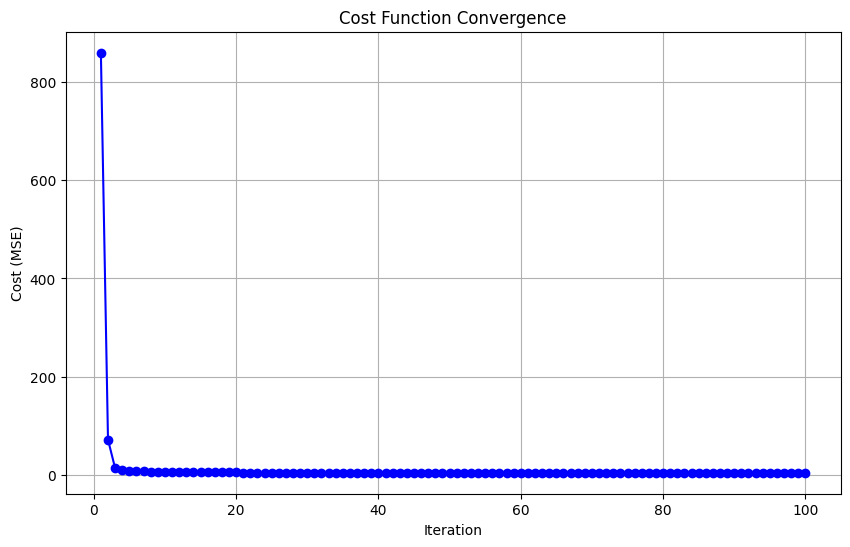

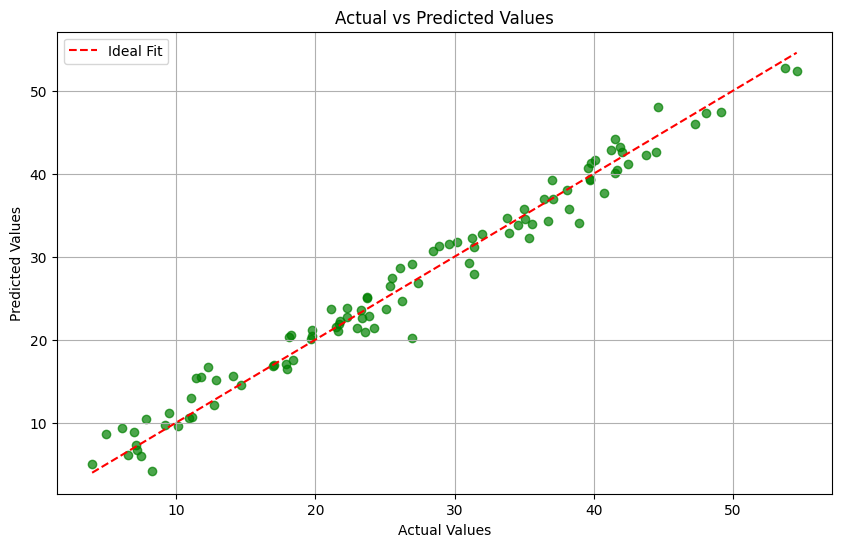

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data for multivariate regression
np.random.seed(42)
X1 = np.random.rand(100) * 10  # Feature 1 (e.g., house size)
X2 = np.random.rand(100) * 5   # Feature 2 (e.g., number of rooms)

# Target variable (e.g., house price)
# True relationship: y = 4*X1 + 3*X2 + noise
y = 4 * X1 + 3 * X2 + np.random.randn(100) * 2

# Stack X1 and X2 into a single matrix with a bias term
X = np.column_stack((np.ones(X1.shape[0]), X1, X2))

# Initialize weights for gradient descent
weights = np.zeros(X.shape[1])  # [b, m1, m2]
learning_rate = 0.01
num_iterations = 100

# To store cost history
cost_history = []

# Gradient Descent Algorithm
for _ in range(num_iterations):
    # Predicted values
    y_pred = np.dot(X, weights)

    # Compute the cost (Mean Squared Error)
    cost = np.mean((y - y_pred) ** 2)
    cost_history.append(cost)

    # Compute gradients
    gradients = -2 * np.dot(X.T, (y - y_pred)) / X.shape[0]

    # Update weights
    weights -= learning_rate * gradients

# Extract learned parameters
b, m1, m2 = weights
print(f"Learned parameters: b = {b:.2f}, m1 = {m1:.2f}, m2 = {m2:.2f}")

# Visualizing cost function convergence
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_iterations + 1), cost_history, marker='o', color='b')
plt.title('Cost Function Convergence')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.grid(True)
plt.show()

# Visualizing predicted vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y, np.dot(X, weights), color='g', alpha=0.7)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y), max(y)], [min(y), max(y)], color='r', linestyle='--', label='Ideal Fit')
plt.legend()
plt.grid(True)
plt.show()
